In [5]:
# conecta o ambiente em execução com o Google Driver
import pandas as pd
import numpy as np
#importa as bibliotecas necessárias
import plotly as py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# abrindo arquivo de dados
data = pd.read_csv("/home/ufscar/Downloads/tcc/data/cicresearch.ca/IOTDataset/CIC_IOT_Dataset2023/Dataset/CSV/MERGED_CSV/Merged36.csv", nrows=300000) #abrindo arquivo de treino
#data = data.sample(n=100)
display(data.info())
display(data.head())

# Std, Variance, Rate possuem valores null, null, inf respectivamente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Header_Length    300000 non-null  float64
 1   Protocol Type    300000 non-null  int64  
 2   Time_To_Live     300000 non-null  float64
 3   Rate             300000 non-null  float64
 4   fin_flag_number  300000 non-null  float64
 5   syn_flag_number  300000 non-null  float64
 6   rst_flag_number  300000 non-null  float64
 7   psh_flag_number  300000 non-null  float64
 8   ack_flag_number  300000 non-null  float64
 9   ece_flag_number  300000 non-null  float64
 10  cwr_flag_number  300000 non-null  float64
 11  ack_count        300000 non-null  int64  
 12  syn_count        300000 non-null  int64  
 13  fin_count        300000 non-null  int64  
 14  rst_count        300000 non-null  int64  
 15  HTTP             300000 non-null  float64
 16  HTTPS            300000 non-null  floa

None

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,20.00,6,64.00,45744.399607,0.0,1.00,0.00,0.0,0.00,0.0,...,6000,60,60,60.0,0.0,60.0,0.000022,100,0.0,DDOS-SYN_FLOOD
1,21.44,6,64.00,15979.518440,0.0,0.96,0.03,0.0,0.39,0.0,...,6000,60,60,60.0,0.0,60.0,0.000063,100,0.0,DOS-SYN_FLOOD
2,20.00,6,64.00,32142.723580,0.0,0.00,0.00,0.0,0.00,0.0,...,6000,60,60,60.0,0.0,60.0,0.000031,100,0.0,DDOS-TCP_FLOOD
3,20.00,6,64.00,13027.811772,0.0,0.00,1.00,0.0,0.00,0.0,...,6000,60,60,60.0,0.0,60.0,0.000077,100,0.0,DOS-SYN_FLOOD
4,20.00,6,64.59,37216.539485,0.0,0.00,0.00,0.0,0.01,0.0,...,6000,60,60,60.0,0.0,60.0,0.000027,100,0.0,DDOS-TCP_FLOOD


In [6]:
#drop da coluna Rate
#data = data.drop('Rate', axis=1)
#data = data.drop('Std', axis=1)
#data = data.drop('Variance', axis=1)

data  = data.replace([np.inf, -np.inf], np.nan) #troca valor infinito por NaN
data = data.dropna(how='any')
display(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 299994 entries, 0 to 299999
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Header_Length    299994 non-null  float64
 1   Protocol Type    299994 non-null  int64  
 2   Time_To_Live     299994 non-null  float64
 3   Rate             299994 non-null  float64
 4   fin_flag_number  299994 non-null  float64
 5   syn_flag_number  299994 non-null  float64
 6   rst_flag_number  299994 non-null  float64
 7   psh_flag_number  299994 non-null  float64
 8   ack_flag_number  299994 non-null  float64
 9   ece_flag_number  299994 non-null  float64
 10  cwr_flag_number  299994 non-null  float64
 11  ack_count        299994 non-null  int64  
 12  syn_count        299994 non-null  int64  
 13  fin_count        299994 non-null  int64  
 14  rst_count        299994 non-null  int64  
 15  HTTP             299994 non-null  float64
 16  HTTPS            299994 non-null  float64
 

None

In [ ]:
# Retorna um booleano por coluna: True se houver algum inf/-inf
#colunas_infinitas = data.applymap(np.isinf).any()
#data  = data.replace([np.inf, -np.inf], np.nan)
#display(colunas.head())

In [7]:
display(data.head())
display(data.info())

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,20.00,6,64.00,45744.399607,0.0,1.00,0.00,0.0,0.00,0.0,...,6000,60,60,60.0,0.0,60.0,0.000022,100,0.0,DDOS-SYN_FLOOD
1,21.44,6,64.00,15979.518440,0.0,0.96,0.03,0.0,0.39,0.0,...,6000,60,60,60.0,0.0,60.0,0.000063,100,0.0,DOS-SYN_FLOOD
2,20.00,6,64.00,32142.723580,0.0,0.00,0.00,0.0,0.00,0.0,...,6000,60,60,60.0,0.0,60.0,0.000031,100,0.0,DDOS-TCP_FLOOD
3,20.00,6,64.00,13027.811772,0.0,0.00,1.00,0.0,0.00,0.0,...,6000,60,60,60.0,0.0,60.0,0.000077,100,0.0,DOS-SYN_FLOOD
4,20.00,6,64.59,37216.539485,0.0,0.00,0.00,0.0,0.01,0.0,...,6000,60,60,60.0,0.0,60.0,0.000027,100,0.0,DDOS-TCP_FLOOD


<class 'pandas.core.frame.DataFrame'>
Index: 299994 entries, 0 to 299999
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Header_Length    299994 non-null  float64
 1   Protocol Type    299994 non-null  int64  
 2   Time_To_Live     299994 non-null  float64
 3   Rate             299994 non-null  float64
 4   fin_flag_number  299994 non-null  float64
 5   syn_flag_number  299994 non-null  float64
 6   rst_flag_number  299994 non-null  float64
 7   psh_flag_number  299994 non-null  float64
 8   ack_flag_number  299994 non-null  float64
 9   ece_flag_number  299994 non-null  float64
 10  cwr_flag_number  299994 non-null  float64
 11  ack_count        299994 non-null  int64  
 12  syn_count        299994 non-null  int64  
 13  fin_count        299994 non-null  int64  
 14  rst_count        299994 non-null  int64  
 15  HTTP             299994 non-null  float64
 16  HTTPS            299994 non-null  float64
 

None

In [8]:
# Se necessário, encode as variáveis categóricas
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

In [9]:
# Amostragem
# Separar as variáveis independentes (features) e a variável dependente (target)
X = data.drop(columns=['Label'])
y = data['Label']

In [10]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [11]:
display(X_test.head())
display(y_test.head())

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance
15905,20.0,6,64.00,30552.913753,0.0,1.0,0.0,0.0,0.0,0.0,...,1.00,6000,60,60,60.00,0.0,60.00,0.000033,100,0.00
55619,8.0,17,64.00,30702.759681,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,6000,60,60,60.00,0.0,60.00,0.000033,100,0.00
121416,0.0,47,63.36,5241.373105,0.0,0.0,0.0,0.0,0.0,0.0,...,0.99,57282,60,578,572.82,51.8,572.82,0.000192,100,2683.24
139015,8.0,17,64.00,37134.165560,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,6000,60,60,60.00,0.0,60.00,0.000027,100,0.00
218475,20.0,6,64.00,37610.329986,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,6000,60,60,60.00,0.0,60.00,0.000027,100,0.00


15905     11
55619     14
121416    23
139015    21
218475    13
Name: Label, dtype: int64

In [12]:
# selecao modelos
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.metrics import brier_score_loss as brier
from sklearn.metrics import log_loss, precision_score, recall_score

def get_model_metrics(model_name, threshold, y_prob, y_test):
    # salvando resultado
    y_pred = (y_prob > threshold)*1
    acc_estimate = round(acc(y_test,y_pred), 3)
    log_estimate = round(log_loss(y_test,y_prob), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1_score = round(f1(y_test, y_pred), 3)

    #ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize = 'all')
    #plt.show()


    return pd.DataFrame({
        'Method': [model_name],
        'Acurácia': [acc_estimate],
        "Precisão": [precision],
        "Recall": [recall],
        'F1': [f1_score],
        'Log-loss': [log_estimate]
    })

In [13]:
#
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler

transformer = ColumnTransformer([
   ('numeric', StandardScaler(), ['Header_Length','Protocol Type','Time_To_Live','Rate','fin_flag_number','syn_flag_number',
                                'rst_flag_number','psh_flag_number','ack_flag_number','ece_flag_number','cwr_flag_number',
                                'ack_count','syn_count','fin_count','rst_count','HTTP','HTTPS','DNS','Telnet','SMTP','SSH',
                                'IRC','TCP','UDP','DHCP','ARP','ICMP','IGMP','IPv','LLC','Tot sum','Min','Max','AVG', 'Std',
                                'Tot size','IAT','Number','Variance'])
  ])

X_train = transformer.fit_transform(X_train)
features = transformer.get_feature_names_out()
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(transformer.transform(X_test), columns=features)

Header_Length
Protocol Type
Time_To_Live
Rate
fin_flag_number
syn_flag_number
rst_flag_number
psh_flag_number
ack_flag_number
ece_flag_number
cwr_flag_number
ack_count
syn_count
fin_count
rst_count
HTTP
HTTPS
DNS
Telnet
SMTP
SSH
IRC
TCP
UDP
DHCP
ARP
ICMP
IGMP
IPv
LLC
Tot sum
Min
Max
AVG
Std
Tot size
IAT
Number
Variance
Label

In [16]:
display(X_train.head())
display(y_train.head())

models = {}
resultados = pd.DataFrame(columns = ['Method','Acurácia', 'Precisão', "Recall",'F1','Log-loss'])

,numeric__Header_Length,numeric__Protocol Type,numeric__Time_To_Live,numeric__Rate,numeric__fin_flag_number,numeric__syn_flag_number,numeric__rst_flag_number,numeric__psh_flag_number,numeric__ack_flag_number,numeric__ece_flag_number,...,numeric__LLC,numeric__Tot sum,numeric__Min,numeric__Max,numeric__AVG,numeric__Std,numeric__Tot size,numeric__IAT,numeric__Number,numeric__Variance
0,0.747705,-0.339050,-0.044133,-0.828383,-0.309568,-0.516996,-0.326151,-0.267128,-0.315747,-0.017542,...,0.153298,0.069296,-0.186836,4.547868,-0.044235,1.838073,-0.044235,-0.005581,0.2305,0.252641
1,-1.573771,-0.888667,-0.176760,0.517603,-0.309568,-0.516996,-0.326151,-0.339261,-0.410495,-0.017542,...,0.153298,-0.293701,-0.186836,-0.277798,-0.311060,-0.228766,-0.311060,-0.007242,0.2305,-0.082579
2,0.678887,-0.339050,-0.199675,-0.746770,-0.309568,1.935047,-0.326151,-0.339261,-0.378913,-0.017542,...,-0.377740,-0.291443,-0.186836,-0.213275,-0.309400,-0.207714,-0.309400,-0.006289,0.2305,-0.082544
3,0.720178,-0.339050,-0.176760,0.904435,-0.309568,1.985089,-0.326151,-0.339261,-0.410495,-0.017542,...,0.153298,-0.293701,-0.186836,-0.277798,-0.311060,-0.228766,-0.311060,-0.007275,0.2305,-0.082579
4,-0.656191,0.870108,-0.176760,0.065889,-0.309568,-0.516996,-0.326151,-0.339261,-0.410495,-0.017542,...,0.153298,-0.293701,-0.186836,-0.277798,-0.311060,-0.228766,-0.311060,-0.007172,0.2305,-0.082579


107928    13
123063     6
201253    12
133907    11
173730    14
Name: Label, dtype: int64

# Logistica sem penalizacao


In [15]:
from sklearn import linear_model

In [17]:
models['LogisticRegressionNone'] = linear_model.LogisticRegression(penalty = None, max_iter = 1000).fit(X=X_train, y=y_train)

# Logistica com penalizacao

In [ ]:
models['Logistica penalização L1'] = linear_model.LogisticRegressionCV(penalty="l1",solver='liblinear',scoring='neg_log_loss', max_iter=50, cv = 5).fit(X=X_train,y=y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

# Floresta

Melhores Parametros: {'max_depth': 9, 'max_features': 'sqrt'}


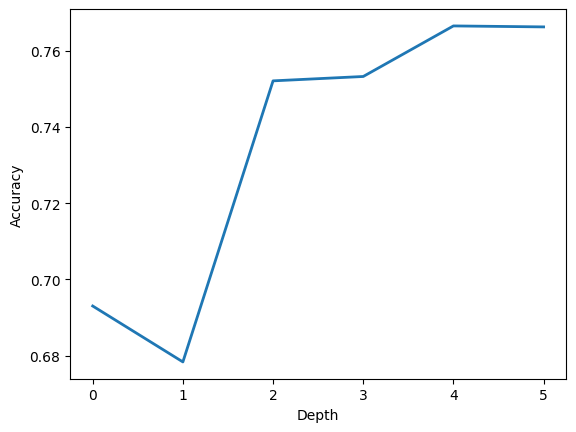

RandomForestClassifier(max_depth=9, random_state=0)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
models['Florestas'] = RandomForestClassifier(random_state = 0, n_estimators = 100)

# otimização de hiperparametros
param_grid = {
    'max_depth': [3, 6, 9],
    'max_features': ['sqrt', 'log2']
    }
floresta_gscv = GridSearchCV(models['Florestas'], param_grid, cv=5,scoring='accuracy')
floresta_gscv.fit(X_train, y_train)

# resultado
print(f"Melhores Parametros: {floresta_gscv.best_params_}")

plt.figure()
plt.plot(floresta_gscv.cv_results_['mean_test_score'],linewidth=2)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

# utilizando o melhores parametros
models['Florestas'].set_params(**floresta_gscv.best_params_)
models['Florestas'].fit(X_train,y_train)

In [ ]:
##################################### ignorar o erro desse trecho
#resultado_modelo = get_model_metrics(
#    model_name='LogisticRegressionNone',
#    threshold=.1,
#    y_prob=models['LogisticRegressionNone'].predict_proba(X_test)[:,1],
#    y_test=y_test)
#resultados = pd.concat([resultados, resultado_modelo])
#resultados

In [25]:
# precision recall f1-score support é calculado aqui
from sklearn.metrics import classification_report
y_pred = models['Florestas'].predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
#print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.00      0.00      0.00         4
                 BENIGN       0.61      0.95      0.75      2173
       BROWSERHIJACKING       0.00      0.00      0.00        11
       COMMANDINJECTION       0.00      0.00      0.00        10
 DDOS-ACK_FRAGMENTATION       0.95      0.99      0.97       552
        DDOS-HTTP_FLOOD       0.78      0.64      0.71        45
        DDOS-ICMP_FLOOD       1.00      1.00      1.00     13851
DDOS-ICMP_FRAGMENTATION       1.00      0.98      0.99       852
      DDOS-PSHACK_FLOOD       1.00      1.00      1.00      7769
       DDOS-RSTFINFLOOD       1.00      1.00      1.00      7695
         DDOS-SLOWLORIS       0.76      0.49      0.60        57
DDOS-SYNONYMOUSIP_FLOOD       0.54      0.34      0.42      6888
         DDOS-SYN_FLOOD       0.43      0.73      0.54      7771
         DDOS-TCP_FLOOD       0.63      0.99      0.77      8554
         DDOS-UDP_FLOOD 

/home/afonso/repos/mlflow/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/afonso/repos/mlflow/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/afonso/repos/mlflow/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",